# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

# Cleaning the data

df_flights.isnull().sum()
delay15 = (df_flights['DepDelay'] > 15).astype(int)
delay15 = delay15.rename('DepDel15')
df_flights.update(delay15)
df_flights.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

Q1
 DepDelay    -4.0
ArrDelay   -11.0
Name: 0.25, dtype: float64
 Q3
 DepDelay     9.0
ArrDelay    10.0
Name: 0.75, dtype: float64
 IQR
 DepDelay    13.0
ArrDelay    21.0
dtype: float64
 Lower Bounds 
 DepDelay   -23.5
ArrDelay   -42.5
dtype: float64
 Upper Bounds
 DepDelay    28.5
ArrDelay    41.5
dtype: float64


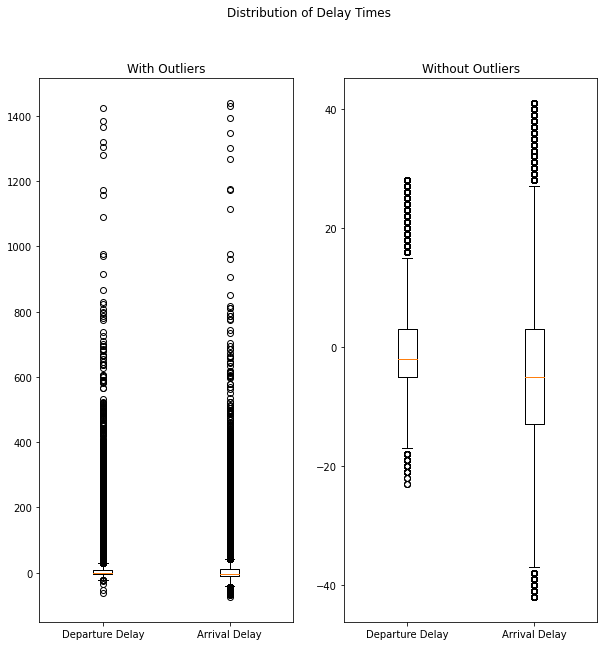

In [15]:
# remove outliers

Q1 = df_flights[['DepDelay', 'ArrDelay']].quantile(0.25)
Q3 = df_flights[['DepDelay', 'ArrDelay']].quantile(0.75)
IQR = Q3-Q1
lower_bounds = Q1 - IQR*1.5
upper_bounds = Q3 + IQR*1.5

dep_query = '@lower_bounds[0] < DepDelay < @upper_bounds[0]'
arr_query = '@lower_bounds[1] < ArrDelay < @upper_bounds[1]'

print('Q1\n {}\n Q3\n {}\n IQR\n {}\n Lower Bounds \n {}\n Upper Bounds\n {}'.format(Q1, Q3, IQR, lower_bounds, upper_bounds))

##


df_flights_outliers = df_flights.query(dep_query + '&' + arr_query)

# plotting the difference

fig, axs = plt.subplots(1, 2, figsize = [10, 10])
axs[0].boxplot([df_flights['DepDelay'], df_flights['ArrDelay']])
axs[0].set_xticklabels(['Departure Delay', 'Arrival Delay'])
axs[0].set_title('With Outliers')
axs[1].boxplot([df_flights_outliers.DepDelay, df_flights_outliers.ArrDelay])
axs[1].set_xticklabels(['Departure Delay', 'Arrival Delay'])
axs[1].set_title('Without Outliers')
fig.suptitle('Distribution of Delay Times')
plt.show()

In [4]:
# identify different columns

numeric_features = ['Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'CRSArrTime']
categorical_features = ['Carrier', 'OriginAirportID', 'OriginCity', 'OriginState', 'DestAirportID', 'DestCity', 'DestState']
numeric_labels = ['DepDelay', 'ArrDelay']
categorical_labels = ['DepDel15', 'ArrDel15', 'Cancelled']

In [5]:
df_flights_outliers[numeric_features + numeric_labels].describe()

,Month,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,DepDelay,ArrDelay
count,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000,235067.000000
mean,7.017969,15.801303,3.903555,1293.518831,1475.744520,0.373447,-4.029843
std,2.003171,8.849921,1.996283,470.134495,488.196462,8.029744,12.959713
min,4.000000,1.000000,1.000000,1.000000,1.000000,-23.000000,-42.000000
25%,5.000000,8.000000,2.000000,900.000000,1101.000000,-5.000000,-13.000000
50%,7.000000,16.000000,4.000000,1250.000000,1458.000000,-2.000000,-5.000000
75%,9.000000,23.000000,6.000000,1700.000000,1858.000000,3.000000,3.000000
max,10.000000,31.000000,7.000000,2359.000000,2359.000000,28.000000,41.000000


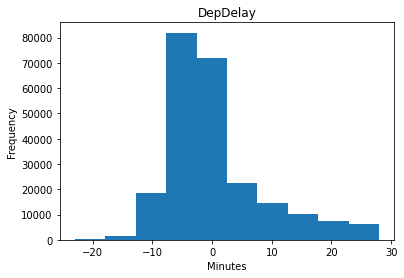

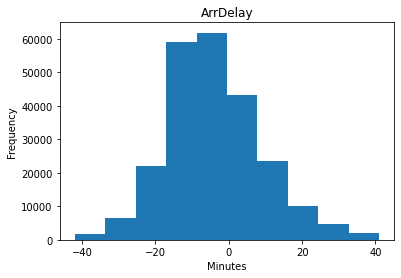

In [6]:
#visualising distribution of delay times

for col in ['DepDelay', 'ArrDelay']:
    fig = plt.figure()
    plt.hist(df_flights_outliers[col])
    # df_flights_outliers.plot.density()
    plt.title(col)
    plt.xlabel('Minutes')
    plt.ylabel('Frequency')

plt.show()

In [7]:
# What the are mean departure and arrival delays?

print("Mean Departure delay: {}\n Mean Arrival Delay: {}".format(df_flights_outliers['DepDelay'].mean(), df_flights_outliers['ArrDelay'].mean()))

Mean Departure delay: 0.3734467194459452
 Mean Arrival Delay: -4.029842555526722


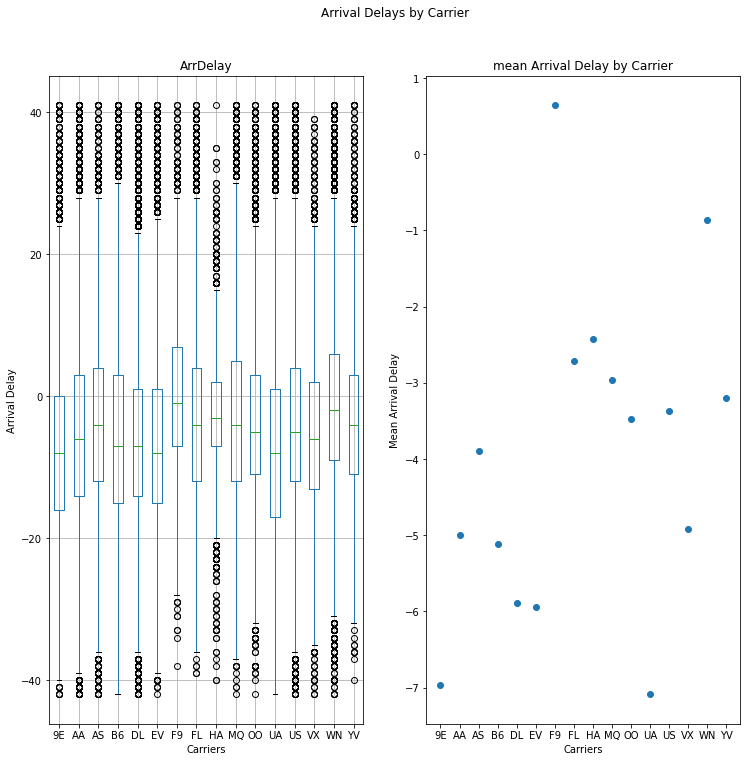

In [8]:
# arrival delay by carriers

carrier_delays = df_flights_outliers.groupby('Carrier').mean().ArrDelay.values
carriers = df_flights_outliers.groupby('Carrier').mean().index.values

fig, axs = plt.subplots(1, 2, figsize = [12,12])
df_flights_outliers.boxplot('ArrDelay', by = 'Carrier', ax = axs[0])
axs[0].set_xlabel('Carriers')
axs[0].set_ylabel('Arrival Delay')
axs[1].scatter(carriers, carrier_delays)
axs[1].set_title('mean Arrival Delay by Carrier')
axs[1].set_xlabel('Carriers')
axs[1].set_ylabel('Mean Arrival Delay')
fig.suptitle('Arrival Delays by Carrier')

plt.show()

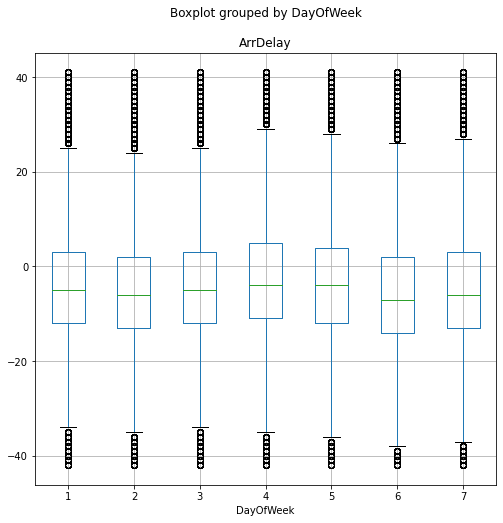

In [9]:
#Arrival Delays by Carrier
ax = df_flights_outliers.boxplot('ArrDelay', by = 'DayOfWeek', figsize = [8, 8])
plt.show()


No substantial difference between arrival delays for flights across weekdays

In [10]:
#Airport with highest mean departure time

df_grouped = df_flights_outliers[['OriginAirportID', 'DepDelay']].groupby('OriginAirportID').mean()

print('The airport with the highest mean departure delay is {}'.format(df_flights_outliers[df_flights_outliers['OriginAirportID'] == df_grouped.sort_values('DepDelay', ascending=False).index[0]]['OriginAirportName'].iloc[0]))

The airport with the highest mean departure delay is Chicago Midway International


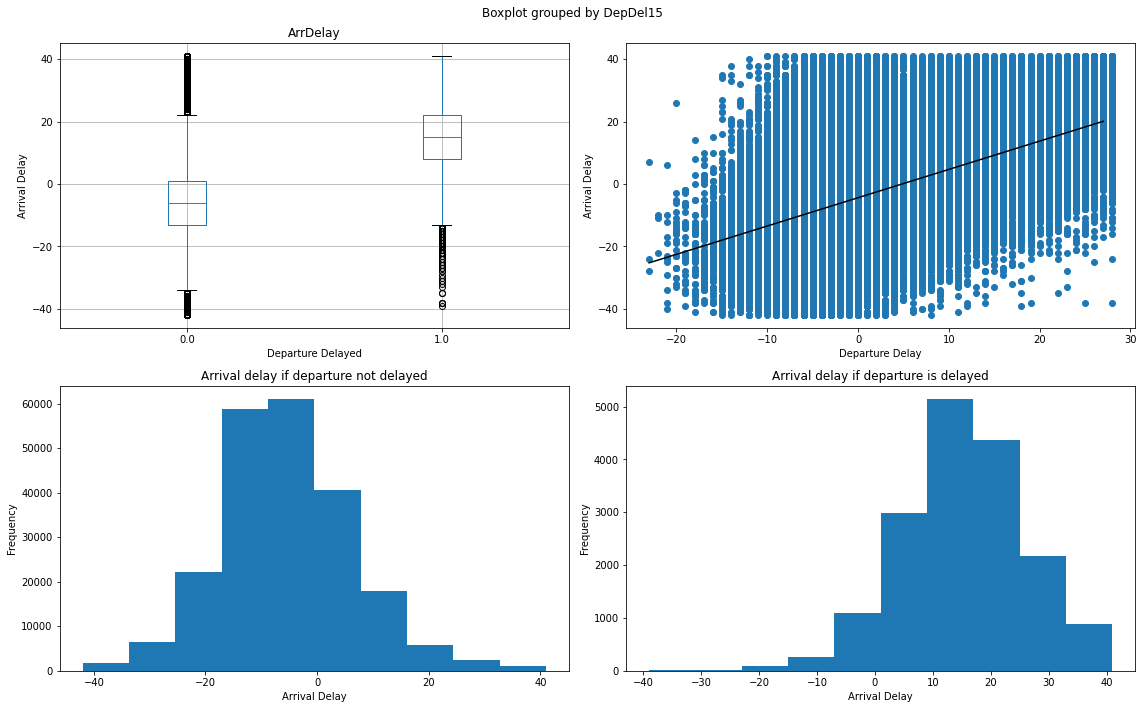

In [11]:
#comparing late arrivals with late departures

fig, axs = plt.subplots(2, 2, figsize = [16, 10])
#boxplot
df_flights_outliers.boxplot('ArrDelay', by = 'DepDel15', ax = axs[0, 0])
axs[0, 0].set_xlabel('Departure Delayed')
axs[0, 0].set_ylabel('Arrival Delay')
#scatterplot
axs[0, 1].scatter(df_flights_outliers['DepDelay'], df_flights_outliers['ArrDelay'])
axs[0, 1].set_xlabel('Departure Delay')
axs[0, 1].set_ylabel('Arrival Delay')
#regressionline
reg_line = np.polyfit(df_flights_outliers['DepDelay'], df_flights_outliers['ArrDelay'], 1)
reg_eq = np.poly1d(reg_line)
plt.sca(axs[0,1])
x_linspace = range(int(lower_bounds[0]), int(upper_bounds[0]))
axs[0, 1].plot(x_linspace, reg_eq(x_linspace), color = 'black')
#histograms
axs[1, 0].hist(df_flights_outliers[df_flights_outliers['DepDel15'] == 0]['ArrDelay'])
axs[1, 0].set_title('Arrival delay if departure not delayed')
axs[1, 0].set_xlabel('Arrival Delay')
axs[1, 0].set_ylabel('Frequency')
axs[1, 1].hist(df_flights_outliers[df_flights_outliers['DepDel15'] == 1]['ArrDelay'])
axs[1, 1].set_title('Arrival delay if departure is delayed')
axs[1, 1].set_xlabel('Arrival Delay')
axs[1, 1].set_ylabel('Frequency')
fig.tight_layout()


plt.show()

Flights that depart delayed tend to arrive delayed

In [57]:
# grouping by routes to identify routes with max count of flights with delayed arrival and highest average arrival delay

df_grouped = df_flights_outliers[['OriginAirportID', 'DestAirportID', 'ArrDelay', 'ArrDel15']].groupby(['OriginAirportID', 'DestAirportID']).agg({'ArrDelay': 'mean', 'ArrDel15': 'count'})

most_late_arrivals = df_grouped.sort_values('ArrDel15', ascending = False).index[0]
greatest_delay = df_grouped.sort_values('ArrDelay', ascending = False).index[0]

late_arrivals_route = [df_flights_outliers[df_flights_outliers['OriginAirportID'] == most_late_arrivals[0]]['OriginAirportName'].values[0], df_flights_outliers[df_flights_outliers['DestAirportID'] == most_late_arrivals[1]]['DestAirportName'].values[0]]
greatest_delay_route = [df_flights_outliers[df_flights_outliers['OriginAirportID'] == greatest_delay[0]]['OriginAirportName'].values[0], df_flights_outliers[df_flights_outliers['DestAirportID'] == greatest_delay[1]]['DestAirportName'].values[0]]

print('Flights flying from {} to {} experienced the most number of delayed arrivals while flights on the {}-{} route had the longest arrival delay on average.'.format(late_arrivals_route[0], late_arrivals_route[1], greatest_delay_route[0], greatest_delay_route[1]))
#     count += 1

Flights flying from San Francisco International to Los Angeles International experienced the most number of delayed arrivals while flights on the Louis Armstrong New Orleans International-Ronald Reagan Washington National route had the longest arrival delay on average.
